In [10]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import tensorflow as tf
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [ ]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


In [6]:
initial_lr = 0.1
loss = "sparse_categorical_crossentropy"
model.compile(SGD(lr=initial_lr), loss=loss ,metrics=['accuracy'])
model.summary()

In [7]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)

In [8]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.720


## Data Augmentation


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [10]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [17]:
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [18]:
steps = int(x_train.shape[0] / 64)

In [12]:
datagen.fit(x_train)

In [20]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=64),
                                    epochs=100,
                                    validation_data=(x_test, y_test),
                                    workers=4)

#history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(x_test, y_test), verbose=0)

Epoch 1/100
782/782 [==============================] - 29s 37ms/step - loss: 0.7202 - accuracy: 0.7457 - val_loss: 0.7251 - val_accuracy: 0.7543
Epoch 2/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6959 - accuracy: 0.7576 - val_loss: 0.7568 - val_accuracy: 0.7516
Epoch 3/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6767 - accuracy: 0.7621 - val_loss: 0.7056 - val_accuracy: 0.7609
Epoch 4/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6607 - accuracy: 0.7668 - val_loss: 0.7199 - val_accuracy: 0.7562
Epoch 5/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6447 - accuracy: 0.7759 - val_loss: 0.6701 - val_accuracy: 0.7735
Epoch 6/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6336 - accuracy: 0.7789 - val_loss: 0.6658 - val_accuracy: 0.7817
Epoch 7/100
782/782 [==============================] - 29s 37ms/step - loss: 0.6210 - accuracy: 0.7839 - val_loss: 0.6878 - val_ac

In [22]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 83.460


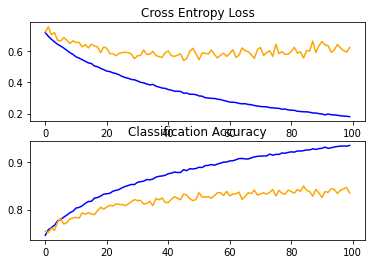

In [24]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')